<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Iowa Liquor Sales 

---

Project 3, unlike project 2 which combined skills from weeks 1 and 2, will now be review of week 2. Projects going forward will fit this format: you learn material one week and review it through a project the following week.

That being said, this is as you might expect more challenging. You will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in Project 2.

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [21]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

plt.style.use('fivethirtyeight')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
iowa_file = 'Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.info()  # shows basic type and column information
iowa.describe() # shows both what variables can't be described and basic numeric metrics (min, max, mean, etc.)
iowa.isnull().sum() # counts the null values by column to see how big an issue that is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [4]:
def clean_objects(series): # this function takes a series and goes through converting each element to float if possible
    try:
        series = series.replace('$','')
        series = series.replace('.','')
        series = float(series)
    except:
        series = series
    return series

def clean_df(df): # this function just goes through each series in a dataframe and cleans it using the above function.
    df = df.map(clean_objects)
    return df

### 3.2 Clean the columns

In [5]:
iowa_cleaned = iowa.apply(clean_df)
iowa_cleaned = iowa_cleaned.dropna() 
iowa_cleaned['Date'] = pd.to_datetime(iowa_cleaned['Date']) # For use in later questions I decided to convert the 
# date into datetime formats

# As only ~3-4% of the records are null I decided to drop them instead of coercing them as I believe the overall data
# and analysis will yield similar results.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [6]:
# Didn't have time honestly this week for bonus/expert questions but I'd go through removing outliers and perhaps
# normalizing data if applicable. I'd also think about removing unnecessary columns (Category vs. Category Name)
# but that would be secondary. Would love some feedback of other things to do. Changing column labels?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [7]:
import datetime

iowa_cleaned['Year'] = iowa_cleaned['Date'].map(lambda val: val.year) # since dates are now in datetime I can extract
# the year into it's own column

def date_format(series): # this function converts the date of a series into a mmyy format which I used for the later masks.
    series = series.strftime('%m%y')
    return series

iowa_cleaned['Month/Year'] = iowa_cleaned['Date'].map(date_format)

grouped_stores = iowa_cleaned.groupby('Store Number')['Month/Year'].agg([np.min,np.max])
# this line groups the data by store number and then finds the minimum and maximum dates 

grouped_stores.reset_index()
grouped_stores['amin'] = pd.to_numeric(grouped_stores['amin']) 
grouped_stores['amax'] = pd.to_numeric(grouped_stores['amax'])
# not sure if this is necessary but converts the min and max into numeric formats for future masks

In [8]:
date_mask = (grouped_stores['amin']<=115)&(grouped_stores['amax']>=1215)
# this mask tries to only keep stores that have a minimum date of Jan 2015 or before and stores that have a max 
# date of Dec 2015 or later. If this is true it would mean they were around for all of 2015.

grouped_stores = grouped_stores[date_mask]

stores_list = list(grouped_stores.index)

stores_mask = iowa_cleaned['Store Number'].isin(stores_list) # this masks goes back to find all stores which were 
# in the list of stores created by the date mask above.

iowa_dated = iowa_cleaned[stores_mask] # this only keeps those stores within the mask, removing stores which weren't
# around for all of 2015 by my above definition

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [9]:
year_mask = iowa_dated['Year']==2015 #mask to filter only 2015 data

liquor = iowa_dated[year_mask].groupby('Store Number').sum().reset_index() #groups by store and sums all other columns
liquor = pd.DataFrame(liquor, columns=liquor.columns)
liquor.sort_values(by='Sale (Dollars)',ascending=False)[['Store Number','Sale (Dollars)']] 
# shows stores and total Sale for 2015 from highest to lowest

,Store Number,Sale (Dollars)
121,2633,99792442.0
886,4829,87466418.0
175,3385,43958435.0
33,2512,41953461.0
181,3420,34883736.0
358,3952,33187438.0
295,3814,24741742.0
174,3354,24015372.0
278,3773,23206678.0
149,2670,22706096.0


### 5.2 Calculate the profit each store is making in 2015.


In [10]:
iowa_dated['Profit'] = iowa_dated['Bottles Sold']*(iowa_dated['State Bottle Retail'] - iowa_dated['State Bottle Cost'])
# creates my profit column with the above formula

profit = iowa_dated[year_mask].groupby('Store Number').sum().reset_index() #same groupby as above
profit = pd.DataFrame(profit, columns=profit.columns)
profit.sort_values(by='Profit',ascending=False)[['Store Number','Profit']] #again just shows profit from highest to lowest

/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Store Number,Profit
121,2633,33286387.0
886,4829,29181375.0
175,3385,14708462.0
33,2512,14007272.0
181,3420,11653224.0
358,3952,11075081.0
295,3814,8300448.0
174,3354,8017395.0
278,3773,7739383.0
149,2670,7581835.0


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [11]:
iowa_dated['Profit/Gallon'] = iowa_dated['Profit']/iowa_dated['Volume Sold (Gallons)']
#creates my profit/gallon column

# same process as 5.1 and 5.2, except this time grouping by county.
counties = iowa_dated[year_mask].groupby('County').sum().reset_index()
counties = pd.DataFrame(counties, columns=counties.columns)
counties.sort_values(by='Profit/Gallon',ascending=False)[['County','Profit/Gallon']] 

/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,County,Profit/Gallon
76,Polk,8.824769e+07
56,Linn,3.949668e+07
81,Scott,3.153658e+07
6,Black Hawk,2.703001e+07
51,Johnson,2.440928e+07
84,Story,1.616836e+07
77,Pottawattamie,1.587187e+07
96,Woodbury,1.571657e+07
30,Dubuque,1.342902e+07
16,Cerro Gordo,1.120326e+07


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

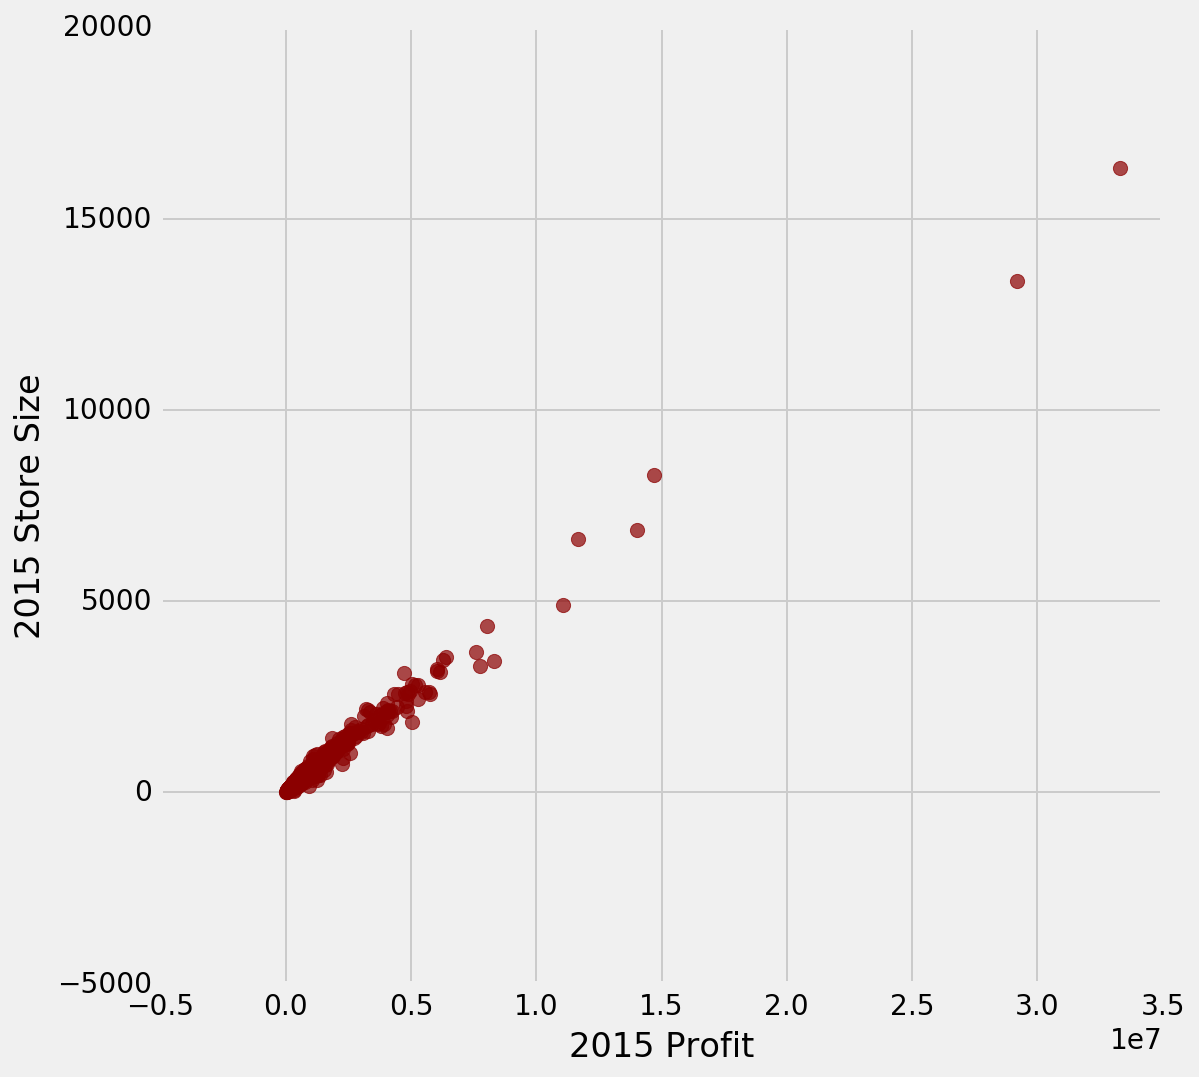

In [24]:
# since my profit group from 5.2 already has both total profit and total volume in 2015 by store I can use it in a
# scatter plot to see if the data points have a positive correlation. I also can take the correlation matrix of the 
# two variables as shown below.

fig = plt.figure(figsize = (8,8))
ax = fig.gca()
ax.scatter(profit['Profit'],profit['Volume Sold (Gallons)'],s=50,alpha=.7,color='darkred')
plt.xlabel('2015 Profit')
plt.ylabel('2015 Store Size')
plt.show()

In [26]:
profit[['Profit','Volume Sold (Gallons)']].corr()

,Profit,Volume Sold (Gallons)
Profit,1.000000,0.992478
Volume Sold (Gallons),0.992478,1.000000


### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [32]:
def liquor_type(series):
    series = series.split(' ')
    for element in series:
        if (element.lower() == 'vodka')|(element.lower() == 'vodkas'):
            item_type = 'Vodka'
            break
        elif (element.lower() == 'whiskey')|(element.lower() == 'whiskies'):
            item_type = 'Whiskey'
            break
        elif (element.lower() == 'tequila')|(element.lower() == 'tequilas'):
            item_type = 'Tequila'
            break
        elif (element.lower() == 'rum')|(element.lower() == 'rums'):
            item_type = 'Rum'
            break
        elif (element.lower() == 'brandy')|(element.lower() == 'brandies'):
            item_type = 'Brandy'
            break
        else:
            item_type = 'Other'
    return item_type

iowa_dated['Item Type'] = iowa_dated['Category Name'].map(liquor_type)
iowa_dated.head()

/home/llevin/anaconda2/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month/Year,Profit,Profit/Gallon,Item Type
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,675.0,12,8100.0,9.0,2.38,2015,1115,2700.0,1134.453782,Brandy
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,2063.0,2,4126.0,1.5,0.40,2016,0316,1376.0,3440.000000,Whiskey
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1889.0,24,45336.0,24.0,6.34,2016,0216,15120.0,2384.858044,Whiskey
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1425.0,6,8550.0,10.5,2.77,2016,0216,2850.0,1028.880866,Other
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1080.0,12,12960.0,21.0,5.55,2015,0815,4320.0,778.378378,Vodka


In [33]:
iowa_dated['Item Type'].value_counts()

Whiskey    75902
Vodka      64490
Other      55227
Rum        30500
Brandy     13564
Tequila    11200
Name: Item Type, dtype: int64

### 5.7 Do relationships exist between the broader liquor type and profit?

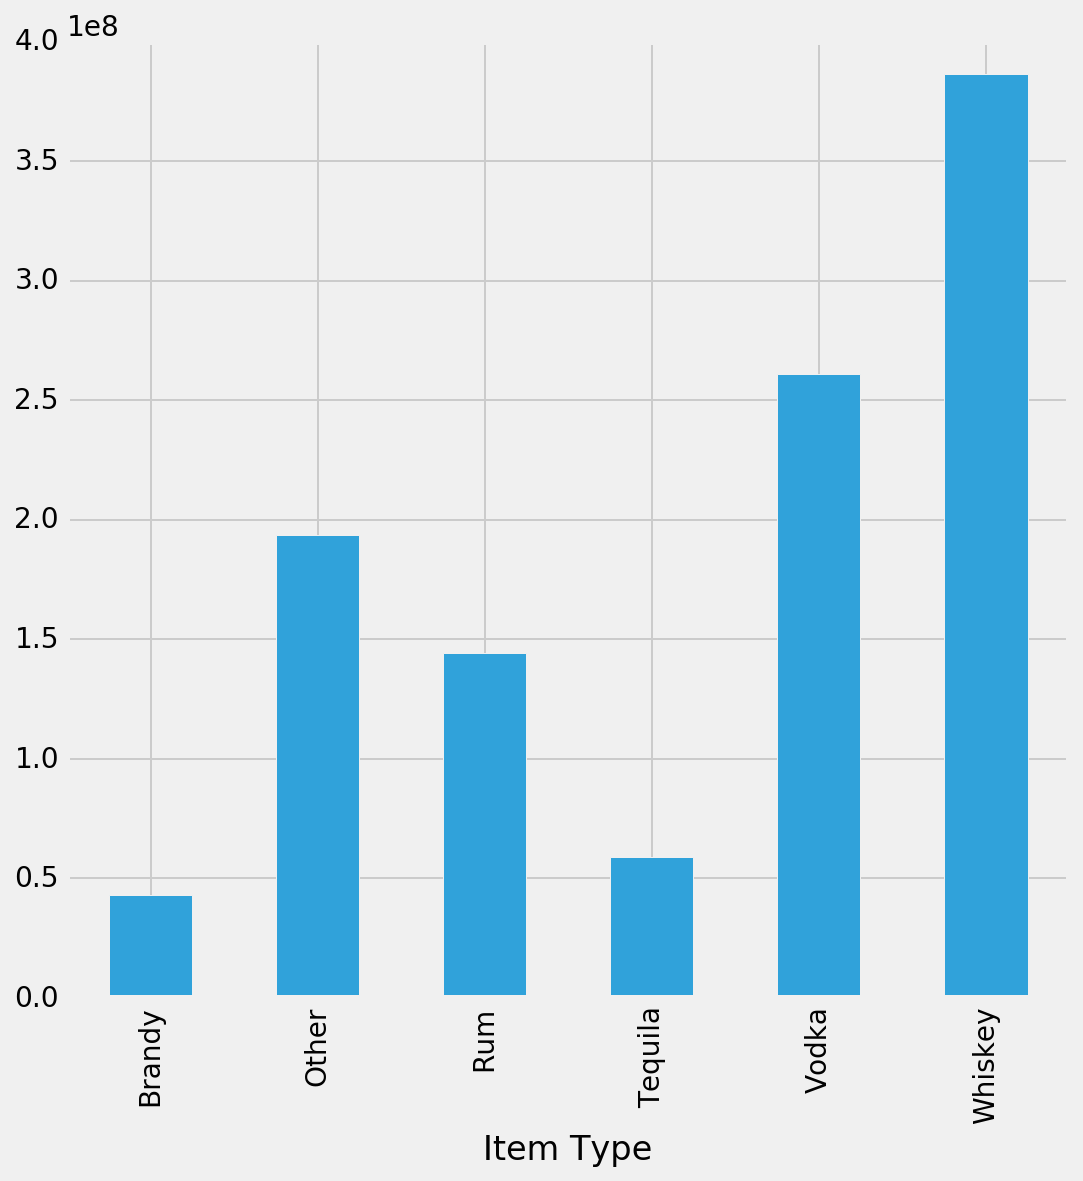

In [97]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
iowa_dated.groupby('Item Type')['Profit'].sum().plot(kind='bar')
plt.show()

#this seems to show that Vodka and Whiskey produce more profit than any other type.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [109]:
#This code finds the top five most profitable stores and then sees which item type they have sold the most of.
top_5_profit_stores = iowa_dated.groupby('Store Number')['Profit'].sum().sort_values(
           ascending = False).reset_index().iloc[0:5, 0].values

top_5_mask = iowa_dated['Store Number'].isin(top_5_profit_stores)

top_5_stores = iowa_dated[top_5_mask]

print top_5_stores.groupby('Item Type')['Volume Sold (Gallons)'].sum().sort_values(ascending=False)
#This code finds the bottom five most profitable stores and then sees which item type they have sold the most of.
#----------------------------------------------------------
bottom_5_profit_stores = iowa_dated.groupby('Store Number')['Profit'].sum().sort_values(
           ascending = True).reset_index().iloc[0:5, 0].values

bottom_5_mask = iowa_dated['Store Number'].isin(bottom_5_profit_stores)

bottom_5_stores = iowa_dated[bottom_5_mask]

print bottom_5_stores.groupby('Item Type')['Volume Sold (Gallons)'].sum().sort_values(ascending=False)

Item Type
Vodka      17204.62
Whiskey    16209.10
Other      13728.58
Rum         8388.51
Tequila     6329.52
Brandy       756.06
Name: Volume Sold (Gallons), dtype: float64
Item Type
Vodka      70.50
Whiskey    44.27
Other      18.24
Rum        16.11
Brandy      3.66
Tequila     1.19
Name: Volume Sold (Gallons), dtype: float64


The goal of the above code is to see if there is an item type which is sold more in the more profitable stores than in the less. Unfortunately it seems the only disticinction between the two is Tequila, which is sold more in the more profitable (top_5) than in the less profitable (bottom_5). If this were all the data we had I would suggest a tax on Tequila which would impact the more profitable stores more-so than the less profitable.

However, the actual answer is this is not enough for a realistic tax. I would change my previous data analysis to: 1) include more item types to see if within these groups (specifically 'Other') if there are any subcategories which are sold more in highly profitable stores, and 2) increase the list of stores in each category (increasing from top and bottom five to 10 to 15, etc.) to see how the numbers change when you start including more data. This is a very high level view and wouldn't recommend anything on this analysis, other than to do more analysis. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [91]:
q12015_mask = (iowa_dated['Date']>='01/01/2015')&(iowa_dated['Date']<='03/31/2015')
q12016_mask = (iowa_dated['Date']>='01/01/2016')&(iowa_dated['Date']<='03/31/2016')

q1_2015 = iowa_dated[q12015_mask]
q1_2016 = iowa_dated[q12016_mask]

q1_2015 = q1_2015.groupby(['Store Number','County'])[['Profit']].sum().reset_index()
q1_2016 = q1_2016.groupby(['Store Number','County'])[['Profit']].sum().reset_index()

merged_q1 = pd.merge(q1_2015,q1_2016, on=['Store Number','County'],how='outer')
merged_q1.rename(columns={'Profit_x':'2015 Profit','Profit_y':'2016 Profit'},inplace=True)

merged_q1['Percent Change (%)']=(merged_q1['2016 Profit']/merged_q1['2015 Profit'])-1
merged_q1 = pd.DataFrame(merged_q1, columns=merged_q1.columns)
merged_q1.sort_values(by='Percent Change (%)',ascending=False)

,Store Number,County,2015 Profit,2016 Profit,Percent Change (%)
595,4401,Linn,1594.0,31045.0,18.476161
926,4896,Allamakee,2004.0,30361.0,14.150200
475,4191,Marion,26410.0,351150.0,12.296100
737,4607,Clayton,3144.0,38520.0,11.251908
723,4591,Wright,2736.0,29076.0,9.627193
693,4539,Greene,4056.0,31983.0,6.885355
451,4159,Pottawattamie,54538.0,352628.0,5.465730
945,4923,Cherokee,2904.0,18624.0,5.413223
393,4034,Allamakee,9194.0,50456.0,4.487927
774,4657,Grundy,6480.0,35298.0,4.447222


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [92]:
# this piece groups the areas together and sums the percent change between 2015 and 2016
high_value_areas = merged_q1.groupby('County')[['2016 Profit','Percent Change (%)']].sum().reset_index()
#--------------------------------------------
# this piece finds the distribution of all Q1 2016 Profit by county
sum_2016 = high_value_areas['2016 Profit'].sum()

high_value_areas['2016 Profit Dist (%)'] = high_value_areas['2016 Profit']/sum_2016

high_value_areas.sort_values(by=['Percent Change (%)','2016 Profit Dist (%)'],ascending=False)
# Note: I know this isn't the best metric and if I had more time/energy I'd have created a weight to apply to the
# absolute change from 2015 to 2016 as I think that would be more effective in finding the best area. 

,County,2016 Profit,Percent Change (%),2016 Profit Dist (%)
76,Polk,40579370.0,29.850591,0.210858
56,Linn,15356066.0,29.155300,0.079793
2,Allamakee,638101.0,19.545635,0.003316
77,Pottawattamie,8673741.0,18.013787,0.045070
21,Clayton,518618.0,12.518071,0.002695
62,Marion,1483887.0,10.954545,0.007711
81,Scott,13304626.0,9.892942,0.069133
98,Wright,386806.0,9.526285,0.002010
96,Woodbury,8161923.0,9.169135,0.042411
16,Cerro Gordo,4106288.0,8.731162,0.021337


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

I would recommend building a store in the Polk area due to it having both the highest total percent change from 2015 to 2016 as well as the highest portion of all Q1 2016 profits.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [88]:
liq_profit = iowa_dated.groupby('Item Type')['Profit'].sum().reset_index()

liq_profit.sort_values(by='Profit',ascending=False)
# This shows that Whiskey is by far the highest profit earner of the liquor types, nearly ~50% more than the second 
# highest, vodka.

,Item Type,Profit
5,Whiskey,386369486.0
4,Vodka,261076552.0
1,Other,193824022.0
2,Rum,144118475.0
3,Tequila,59122359.0
0,Brandy,43125950.0


In [93]:
# then we do a similar analysis as in 6.1 and 6.2 but now limiting data to only Whiskey types.
whiskey_mask = iowa_dated['Item Type']=='Whiskey'
iowa_whiskey = iowa_dated[whiskey_mask]

q12015w_mask = (iowa_whiskey['Date']>='01/01/2015')&(iowa_whiskey['Date']<='03/31/2015')
q12016w_mask = (iowa_whiskey['Date']>='01/01/2016')&(iowa_whiskey['Date']<='03/31/2016')

q1_2015_w = iowa_whiskey[q12015w_mask]
q1_2016_w = iowa_whiskey[q12016w_mask]

q1_2015_w = q1_2015_w.groupby(['Store Number','County'])[['Profit']].sum().reset_index()
q1_2016_w = q1_2016_w.groupby(['Store Number','County'])[['Profit']].sum().reset_index()

merged_q1w = pd.merge(q1_2015_w,q1_2016_w, on=['Store Number','County'],how='outer')
merged_q1w.rename(columns={'Profit_x':'2015 Profit','Profit_y':'2016 Profit'},inplace=True)

merged_q1w['Percent Change (%)']=(merged_q1w['2016 Profit']/merged_q1w['2015 Profit'])-1
merged_q1w = pd.DataFrame(merged_q1w, columns=merged_q1w.columns)
merged_q1w.sort_values(by='Percent Change (%)',ascending=False)

,Store Number,County,2015 Profit,2016 Profit,Percent Change (%)
999,5076.0,Woodbury,356.0,26449.0,73.294944
851,4813.0,Clinton,552.0,21507.0,37.961957
147,2668.0,Decatur,350.0,12217.0,33.905714
537,4313.0,Cass,4776.0,141414.0,28.609296
957,4999.0,Butler,1050.0,19067.0,17.159048
405,4092.0,Warren,24324.0,439181.0,17.055460
866,4841.0,Scott,1790.0,26050.0,13.553073
414,4110.0,Butler,5010.0,62814.0,11.537725
1006,5091.0,Muscatine,730.0,7606.0,9.419178
711,4594.0,Polk,1732.0,16755.0,8.673788


In [95]:
# this piece groups the areas together and sums the percent change between 2015 and 2016
high_value_areas_whiskey = merged_q1w.groupby('County')[['2016 Profit','Percent Change (%)']].sum().reset_index()
#--------------------------------------------
# this piece finds the distribution of all Q1 2016 Profit by county
sum_2016_w = high_value_areas_whiskey['2016 Profit'].sum()

high_value_areas_whiskey['2016 Profit Dist (%)'] = high_value_areas_whiskey['2016 Profit']/sum_2016_w

high_value_areas_whiskey.sort_values(by=['2016 Profit Dist (%)','Percent Change (%)'],ascending=False)
# Note: I know this isn't the best metric and if I had more time/energy I'd have created a weight to apply to the
# absolute change from 2015 to 2016 as I think that would be more effective in finding the best area. 

,County,2016 Profit,Percent Change (%),2016 Profit Dist (%)
76,Polk,12968831.0,55.962021,0.184309
56,Linn,4879653.0,24.414093,0.069348
81,Scott,4061849.0,11.236232,0.057726
77,Pottawattamie,3910834.0,27.780210,0.055579
51,Johnson,3696141.0,7.495435,0.052528
96,Woodbury,3462378.0,99.521009,0.049206
6,Black Hawk,3272501.0,19.781850,0.046508
84,Story,2097093.0,12.358265,0.029803
30,Dubuque,1863991.0,5.071648,0.026490
16,Cerro Gordo,1630685.0,12.147630,0.023175


I would not change my recommended area from Polk because it still remains the highest in percent change from 2015 to 2016 as well as having clearly the highest percent of all 2016 Profit, even when just limiting to whiskey profits.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?